# Загрузка необходимых библиотек

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Эксплораторный анализ данных

## Загрузка данных
Я это делаю по-простому с рабочего стола, так что, если захочется прогнать код самостоятельно, придется загружать данные оттуда, куда вы их сохранили.

In [2]:
data = pd.read_csv('C:\\Users\\darth\\Desktop\\fas_ext.csv')

# на всякий случай заполняем пропуски и бесконечности, хотя в данных их нет
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data = data.fillna(0)

# заполняем y0 и final_y нулями в случае, когда fine_case == 1
data['y0'] = data['y0'] - data['y0']*data['fine_case']
data['final_y'] = data['final_y'] - data['final_y']*data['fine_case']

# создаем size_p -- категориальную переменную, отражающую размер предприятия
data['size_p'] = 0*data['MicroP'] + 1*data['SmallP'] + 2*data['MedP'] + 3*data['LargeP']
data['size_p'] = data['size_p'].astype('int64')

# выбрасываем из данных столбец ID
drop_col = ['ID']
data = data.drop(columns=drop_col)

# смотрим на шапку наших данных
data.head(5)

,cartel,fine_case,y0,appear_d,appear_fas,appear_3,ecm_arg,mark_reg,length_pages,len_days,app_cass,MicroP,SmallP,MedP,LargeP,MSP,final_y,fine,size_p
0,0,0,0,1.0,1.0,1,0,1,18.0,275,1,0,0,1,0,1,0,0.00,2
1,0,1,0,1.0,1.0,0,0,1,4.0,123,0,0,0,0,1,0,0,6408525.01,3
2,1,1,0,0.0,0.0,0,0,1,8.0,52,0,1,0,0,0,1,0,100000.00,0
3,0,0,1,0.0,1.0,0,0,1,14.0,219,0,1,0,0,0,1,1,0.00,0
4,0,0,0,1.0,1.0,0,0,0,17.0,302,1,0,0,1,0,1,0,100000.00,2


In [3]:
# выводим базовую описательную статистику
data.describe()

,cartel,fine_case,y0,appear_d,appear_fas,appear_3,ecm_arg,mark_reg,length_pages,len_days,app_cass,MicroP,SmallP,MedP,LargeP,MSP,final_y,fine,size_p
count,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,9.040000e+02,904.000000
mean,0.308628,0.464602,0.160398,0.877212,0.941372,0.185841,0.043142,1.148230,11.278761,237.951327,0.852876,0.359513,0.164823,0.051991,0.423673,0.576327,0.152655,3.010443e+06,1.539823
std,0.462183,0.499021,0.367178,0.328375,0.235058,0.389193,0.203288,0.900435,6.997211,130.479692,0.774334,0.480123,0.371226,0.222132,0.494413,0.494413,0.359854,1.970322e+07,1.347886
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,7.000000,148.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
50%,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,10.000000,219.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,1.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,14.000000,317.250000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,6.472700e+05,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,79.000000,1127.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.871340e+08,3.000000


Коррелограмма, которая, однако, не дает нетривиальных инсайтов.

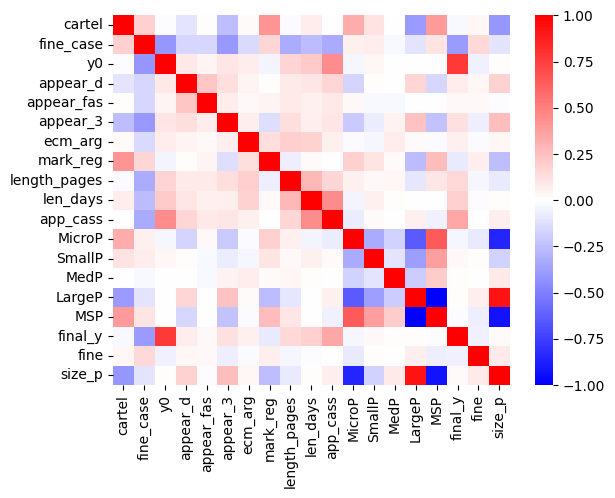

In [4]:
corr = data.select_dtypes('number').corr()
sns.heatmap(corr, cmap='bwr')
plt.show()

## Данные в разрезе размера предприятия

Сначала создаем таблицу с условными средними всех переменных в разрезе по размеру предприятия, то есть переменной $\tt{size\_p}$.

In [5]:
cond_avgs = data.groupby('size_p').mean()
cond_avgs
#cond_avgs.to_latex()  # создает код таблицы для вставки в LaTex

,cartel,fine_case,y0,appear_d,appear_fas,appear_3,ecm_arg,mark_reg,length_pages,len_days,app_cass,MicroP,SmallP,MedP,LargeP,MSP,final_y,fine
size_p,,,,,,,,,,,,,,,,,,
0,0.507692,0.504615,0.144615,0.803077,0.950769,0.076923,0.036923,1.366154,11.855385,230.636923,0.778462,1.0,0.0,0.0,0.0,1.0,0.135385,8.771288e+05
1,0.422819,0.550336,0.187919,0.885906,0.926174,0.120805,0.026846,1.362416,11.651007,254.161074,0.885906,0.0,1.0,0.0,0.0,1.0,0.174497,3.702374e+06
2,0.319149,0.404255,0.170213,0.872340,0.914894,0.276596,0.106383,1.212766,12.361702,243.744681,0.851064,0.0,0.0,1.0,0.0,1.0,0.170213,2.894843e+06
3,0.093995,0.404700,0.161880,0.937337,0.942559,0.292428,0.046997,0.872063,10.511749,237.140992,0.903394,0.0,0.0,0.0,1.0,0.0,0.156658,4.565697e+06


Теперь создадим pivot-таблицы, то есть таблицы совместного (выборочного) распределения размера предприятия $\tt{size\_p}$ и двух категориальных переменных -- размера рынка $\tt{mark\_reg}$ и инициатора апелляции/кассации $\tt{app\_cass}$.

In [6]:
# добавим в данные столбец из единиц, чтобы мочь легко посчитать количество ячеек по данному условию
data['ones'] = np.ones_like(data['cartel'])

# таблица size_p VS mark_reg
print(data.pivot_table(index='size_p', columns='mark_reg', values='ones', aggfunc=np.sum))

# таблица size_p VS app_cass
print('\n', data.pivot_table(index='size_p', columns='app_cass', values='ones', aggfunc=np.sum))

mark_reg    0    1    2   3
size_p                     
0          16  195   93  21
1          24   65   42  18
2          13   17   11   6
3         192   67  105  19

 app_cass    0    1   2   3
size_p                    
0         137  132  47   9
1          55   63  24   7
2          18   20   7   2
3         109  212  52  10


Теперь сгенерим красивый KDE-график распределения логарифмов штрафов в разрезе размера предприятия.

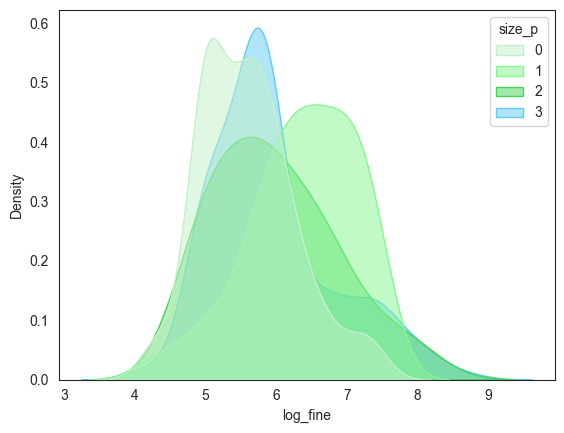

In [7]:
sns.set_style('white')

# создадим десятичный логарифм штрафа
data['log_fine'] = np.log(data['fine'] + 1)/np.log(10)

# создадим кастомную палитру цветов, которая будет мэтчится с общей цветовой гаммой диссертации
palette = ['#C2F1C8', '#84F691', '#47D45A', '#61CBF4']

# непосредственно KDE-график
kde = sns.kdeplot(data=data.loc[data['fine'] > 0], x='log_fine', hue='size_p',
                  fill=True, common_norm=False, palette=sns.color_palette(palette, len(palette)),
                  alpha=.5, linewidth=1)
plt.show()
#kde.figure.savefig('C:\\Users\\darth\\Desktop\\lg_dine_kdes.png', dpi=300)  # код для сохранения картинки

# Корреляционный логит

Подготовим датасет к логит-регрессии, создав наборы данных для моделей на разных подвыборках.

In [8]:
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, roc_auc_score

In [9]:
# Baseline-модель
ddata = data.copy(deep=True)

# Выбрасываем переменные, вызывабщие мультиколлинеарность и эндогенность
ddata = ddata.drop(columns=['MSP', 'y0', 'fine', 'size_p', 'log_fine', 'app_cass', 'fine_case',  'LargeP'])
  
Xtrain = ddata.drop(columns=['final_y'])
ytrain = ddata['final_y']
log_reg = sm.Logit(ytrain, Xtrain).fit(maxiter=100)
print(log_reg.summary())

# Метрики качества модели
yhat = log_reg.predict(Xtrain) 
prediction = list(map(round, yhat))
print(accuracy_score(ytrain, prediction), roc_auc_score(ytrain, prediction))

Optimization terminated successfully.
         Current function value: 0.398181
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                final_y   No. Observations:                  904
Model:                          Logit   Df Residuals:                      892
Method:                           MLE   Df Model:                           11
Date:                Fri, 25 Apr 2025   Pseudo R-squ.:                 0.06812
Time:                        12:34:26   Log-Likelihood:                -359.96
converged:                       True   LL-Null:                       -386.27
Covariance Type:            nonrobust   LLR p-value:                 2.101e-07
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
cartel           0.1283      0.254      0.504      0.614      -0.370       0.627
appear_d         0.5432

In [10]:
# Модель для data_y0
data_y0 = data.copy(deep=True)

# Выбрасываем переменные, вызывабщие мультиколлинеарность и эндогенность
data_y0 = data_y0.drop(columns=['MSP', 'final_y', 'fine', 'size_p', 'log_fine', 'app_cass', 'fine_case', 'LargeP'])
  
Xtrain = data_y0.drop(columns=['y0'])
ytrain = data_y0['y0']
log_reg = sm.Logit(ytrain, Xtrain).fit(maxiter=100)
print(log_reg.summary())

# Метрики качества модели
yhat = log_reg.predict(Xtrain) 
prediction = list(map(round, yhat))
print(accuracy_score(ytrain, prediction), roc_auc_score(ytrain, prediction))

Optimization terminated successfully.
         Current function value: 0.408511
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                     y0   No. Observations:                  904
Model:                          Logit   Df Residuals:                      892
Method:                           MLE   Df Model:                           11
Date:                Fri, 25 Apr 2025   Pseudo R-squ.:                 0.07226
Time:                        12:34:26   Log-Likelihood:                -369.29
converged:                       True   LL-Null:                       -398.06
Covariance Type:            nonrobust   LLR p-value:                 2.660e-08
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
cartel           0.0811      0.247      0.328      0.743      -0.404       0.566
appear_d         0.7168

In [11]:
# Модель для data_no_fine_cases
data_no_fine_cases = data.loc[data['fine_case'] == 0].copy(deep=True)

# Выбрасываем переменные, вызывабщие мультиколлинеарность и эндогенность
data_no_fine_cases = data_no_fine_cases.drop(columns=['MSP', 'y0', 'fine', 'size_p', 'log_fine', 'app_cass', 'fine_case', 'LargeP'])
  
Xtrain = data_no_fine_cases.drop(columns=['final_y'])
ytrain = data_no_fine_cases['final_y']
log_reg = sm.Logit(ytrain, Xtrain).fit(maxiter=100)
print(log_reg.summary())

# Метрики качества модели
yhat = log_reg.predict(Xtrain) 
prediction = list(map(round, yhat))
print(accuracy_score(ytrain, prediction), roc_auc_score(ytrain, prediction))

Optimization terminated successfully.
         Current function value: 0.580311
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                final_y   No. Observations:                  484
Model:                          Logit   Df Residuals:                      472
Method:                           MLE   Df Model:                           11
Date:                Fri, 25 Apr 2025   Pseudo R-squ.:                 0.02914
Time:                        12:34:26   Log-Likelihood:                -280.87
converged:                       True   LL-Null:                       -289.30
Covariance Type:            nonrobust   LLR p-value:                    0.1121
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
cartel           0.2745      0.273      1.004      0.315      -0.261       0.810
appear_d         0.2476

In [12]:
# Модель для data_no_cartels
data_no_cartels = data.loc[(data['cartel'] == 0)].copy(deep=True)

# Выбрасываем переменные, вызывабщие мультиколлинеарность и эндогенность
data_no_cartels = data_no_cartels.drop(columns=['cartel', 'MSP', 'y0', 'fine', 'size_p', 'log_fine', 'app_cass', 'fine_case', 'LargeP'])
  
Xtrain = data_no_cartels.drop(columns=['final_y'])
ytrain = data_no_cartels['final_y']
log_reg = sm.Logit(ytrain, Xtrain).fit(maxiter=100)
print(log_reg.summary())

# Метрики качества модели
yhat = log_reg.predict(Xtrain) 
prediction = list(map(round, yhat))
print(accuracy_score(ytrain, prediction), roc_auc_score(ytrain, prediction))

Optimization terminated successfully.
         Current function value: 0.413345
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                final_y   No. Observations:                  625
Model:                          Logit   Df Residuals:                      614
Method:                           MLE   Df Model:                           10
Date:                Fri, 25 Apr 2025   Pseudo R-squ.:                 0.05415
Time:                        12:34:26   Log-Likelihood:                -258.34
converged:                       True   LL-Null:                       -273.13
Covariance Type:            nonrobust   LLR p-value:                  0.001004
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
appear_d         0.0201      0.417      0.048      0.962      -0.798       0.838
appear_fas       0.0517

In [13]:
# Модель для data_no_cartels_with_micro
data_no_cartels_with_micro = data.loc[(data['cartel'] == 0) | data['MicroP'] == 1].copy(deep=True)

# Выбрасываем переменные, вызывабщие мультиколлинеарность и эндогенность
data_no_cartels_with_micro = data_no_cartels_with_micro.drop(columns=['cartel', 'MSP', 'y0', 'fine', 'size_p', 'LargeP',
                                                                      'log_fine', 'LargeP', 'app_cass', 'fine_case'])
  
Xtrain = data_no_cartels_with_micro.drop(columns=['final_y'])
ytrain = data_no_cartels_with_micro['final_y']
log_reg = sm.Logit(ytrain, Xtrain).fit(maxiter=100)
print(log_reg.summary())

# Метрики качества модели
yhat = log_reg.predict(Xtrain) 
prediction = list(map(round, yhat))
print(accuracy_score(ytrain, prediction), roc_auc_score(ytrain, prediction))

Optimization terminated successfully.
         Current function value: 0.392976
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                final_y   No. Observations:                  790
Model:                          Logit   Df Residuals:                      779
Method:                           MLE   Df Model:                           10
Date:                Fri, 25 Apr 2025   Pseudo R-squ.:                 0.06791
Time:                        12:34:26   Log-Likelihood:                -310.45
converged:                       True   LL-Null:                       -333.07
Covariance Type:            nonrobust   LLR p-value:                 1.968e-06
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
appear_d         0.4731      0.400      1.182      0.237      -0.312       1.258
appear_fas       0.0363

# Байесовская сеть

Почистим данные от переменных, не задействованных в байесовской сети.

In [14]:
drop_col = ['cartel', 'length_pages', 'MSP', 'fine', 'len_days', 'MicroP', 'SmallP', 'MedP', 'LargeP', 'ones', 'log_fine', 'fine_case']
data = data.drop(columns=drop_col)

**Важное замечание**: библиотека $\tt{causalnex}$ работает **только** с $\tt{Python \, 3.9}$, поэтому, если хочется запустить этот код и проверить его самостоятенльно, настоятельно рекомендуется создать отдельное виртуальное окружение с соответствующей версией питона.

In [15]:
from sklearn.model_selection import train_test_split

from IPython.display import Image
from causalnex.structure import StructureModel
from causalnex.structure.notears import from_pandas
from causalnex.plots import plot_structure, display_plot_ipython
from causalnex.network import BayesianNetwork
from causalnex.evaluation import classification_report, roc_auc
from causalnex.estimator.em import EMSingleLatentVariable
from causalnex.inference import InferenceEngine

## Структурная модель
Создаем структурную графовую модель на основе наших данных и веры в предложенный причинный граф.

In [16]:
# создаем структурную модель данных и удаляем все ребра
sm = from_pandas(data)
sm.remove_edges_below_threshold(2)
print(sm.edges)

# добавляем в модель ребра, соответствующие специфицированному графу
sm.add_edges_from([
    ('size_p', 'appear_fas'),
    ('appear_d', 'y0'),
    ('appear_fas', 'y0'),
    ('appear_3', 'y0'),
    ('ecm_arg', 'y0'),
    ('mark_reg', 'y0'),
    #('fine_case', 'y0'),
    ('y0', 'app_cass'),
    ('app_cass', 'final_y'),
    #
    ('size_p', 'appear_d'),
    ('size_p', 'appear_3'),
    #('size_p', 'fine_case'),
    ('size_p', 'app_cass')])

# интерактивно визуализируем граф
viz = plot_structure(sm)
display_plot_ipython(viz, 'C:\\Users\\darth\\Desktop\\DAG1.html')

[]


In [17]:
# Вновь перейдем от бинарных обозначений к текстовым для удобства дальнейшей работы
final_y_map = {0: 'Lose', 1: 'Win'}
y0_map = {0: 'Lose', 1: 'Win'}
mark_reg_map = {0: 'Local', 1: 'City', 2: 'Region', 3: 'Country'}
size_p_map = {0: 'Micro', 1: 'Small', 2: 'Medium', 3: 'Large'}
app_cass_map = {0: 'no app', 1: 'dec app', 2: 'fas app', 3: 'both app'}

data['final_y'] = data['final_y'].map(final_y_map)
data['y0'] = data['y0'].map(final_y_map)
data['mark_reg'] = data['mark_reg'].map(mark_reg_map)
data['size_p'] = data['size_p'].map(size_p_map)
data['app_cass'] = data['app_cass'].map(app_cass_map)

data.head(5)

,y0,appear_d,appear_fas,appear_3,ecm_arg,mark_reg,app_cass,final_y,size_p
0,Lose,1.0,1.0,1,0,City,dec app,Lose,Medium
1,Lose,1.0,1.0,0,0,City,no app,Lose,Large
2,Lose,0.0,0.0,0,0,City,no app,Lose,Micro
3,Win,0.0,1.0,0,0,City,no app,Win,Micro
4,Lose,1.0,1.0,0,0,Local,dec app,Lose,Medium


## Байесовская сеть
Создаем байесовскую сеть без скрытой переменной и на первом этапе учим ее на всем наборе данных по-фреквентистски, заодно замеряя (не очень честное) качество.

In [18]:
# создаем байесовскую сеть и обучаем ее
bn = BayesianNetwork(sm)
bn = bn.fit_node_states(data)

bn = bn.fit_cpds(data, method='BayesianEstimator', bayes_prior='K2')

# измеряем качество получившейся модели
print(classification_report(bn, data, 'final_y'))
roc, auc = roc_auc(bn, data, 'final_y')
print(auc)

{'final_y_Lose': {'precision': 0.9276485788113695, 'recall': 0.9373368146214099, 'f1-score': 0.9324675324675324, 'support': 766.0}, 'final_y_Win': {'precision': 0.6307692307692307, 'recall': 0.5942028985507246, 'f1-score': 0.6119402985074627, 'support': 138.0}, 'accuracy': 0.8849557522123894, 'macro avg': {'precision': 0.7792089047903001, 'recall': 0.7657698565860673, 'f1-score': 0.7722039154874976, 'support': 904.0}, 'weighted avg': {'precision': 0.8823285013447598, 'recall': 0.8849557522123894, 'f1-score': 0.8835374901152209, 'support': 904.0}}
0.9389794130315609


Добавляем удаленные ранее ребра и скрытую переменную вины

In [19]:
edges_to_add = [('size_p', 'Guilt'),
                ('Guilt', 'appear_d'),
                ('Guilt', 'appear_3'),
                #('Guilt', 'fine_case'),
                ('Guilt', 'app_cass')]

edges_to_remove = [('size_p', 'appear_d'),
                   ('size_p', 'appear_3'),
                   #('size_p', 'fine_case'),
                   ('size_p', 'app_cass')]

bn.add_node(
    node='Guilt',
    edges_to_add=edges_to_add,
    edges_to_remove=edges_to_remove)

In [20]:
# визуализируем новую сеть, которая соответствует изначальному графу
viz = plot_structure(bn.structure)
display_plot_ipython(viz, 'C:\\Users\\darth\\Desktop\\DAG2.html')

Определяем априорные распределения для всех потомков вины

In [21]:
# ограничиваем все байесовские вероятности в модели отрезком [0, 1]
boundaries = EMSingleLatentVariable.get_default_box(sm=bn.structure,
                                                    node_states={**bn.node_states,
                                                                 'Guilt': {0, 1}},
                                                    lv_name='Guilt')

# создаем априорные распределения (по умолчанию -- распределения Дирихле)
priors = EMSingleLatentVariable.get_default_priors(sm=bn.structure,
                                                   node_states={**bn.node_states,
                                                                'Guilt': {0, 1}},
                                                   lv_name='Guilt')

priors['appear_d'].iloc[0, 0] = 1.25   # уверенность в том, что appear_d = 0 | Guilt = 0
priors['appear_d'].iloc[1, 0] = 2.5    # уверенность в том, что appear_d = 1 | Guilt = 0
priors['appear_d'].iloc[0, 1] = 1.5    # уверенность в том, что appear_d = 0 | Guilt = 1
priors['appear_d'].iloc[1, 1] = 2      # уверенность в том, что appear_d = 1 | Guilt = 1

priors['appear_3'].iloc[0, 0] = 2      # уверенность в том, что appear_3 = 0 | Guilt = 0
priors['appear_3'].iloc[1, 0] = 1.5    # уверенность в том, что appear_3 = 1 | Guilt = 0
priors['appear_3'].iloc[0, 1] = 1.5    # уверенность в том, что appear_d = 0 | Guilt = 1
priors['appear_3'].iloc[1, 1] = 2      # уверенность в том, что appear_d = 1 | Guilt = 1

#priors['fine_case'].iloc[0, 0] = 3
#priors['fine_case'].iloc[1, 0] = 1.25
#priors['fine_case'].iloc[0, 1] = 1.5
#priors['fine_case'].iloc[1, 1] = 2.5

priors['app_cass'].iloc[0, 0] = 2     # уверенность в том, что app_cass = 0 | Guilt = 0
priors['app_cass'].iloc[1, 0] = 3     # уверенность в том, что app_cass = 1 | Guilt = 0
priors['app_cass'].iloc[2, 0] = 1.5   # уверенность в том, что app_cass = 2 | Guilt = 0
priors['app_cass'].iloc[3, 0] = 1.5   # уверенность в том, что app_cass = 3 | Guilt = 0
priors['app_cass'].iloc[0, 1] = 2.5   # уверенность в том, что app_cass = 0 | Guilt = 1
priors['app_cass'].iloc[1, 1] = 1.5   # уверенность в том, что app_cass = 1 | Guilt = 1
priors['app_cass'].iloc[2, 1] = 3     # уверенность в том, что app_cass = 2 | Guilt = 1
priors['app_cass'].iloc[3, 1] = 1.5   # уверенность в том, что app_cass = 3 | Guilt = 1

Второй этап -- обучаем модель со скрытой переменной с помощью EM-алгоритма (обычно занимает меньше, чем полминуты)

In [22]:
bn.fit_latent_cpds(
    lv_name='Guilt',
    lv_states=[0, 1],
    data=data,
    box_constraints=boundaries,
    priors=priors,
    n_runs=150)

# Инференс на основании обученной байесовской сети

Представленные здесь результаты могут незначительно отличаться от тех, которые указаны в тексте диссертации, из-за естественной дисперсии в данных и в стохастической природе байесовского метода

Распределение вероятности вины по размеру предприятий

In [23]:
bn.cpds['Guilt']

size_p,Large,Medium,Micro,Small
Guilt,,,,
0,0.432667,0.553309,0.891913,0.776981
1,0.567333,0.446691,0.108087,0.223019


Вероятности вины условно на факт выигрыша/проигрыша дела

In [24]:
ie = InferenceEngine(bn)
marginals_Win = ie.query({'final_y': 'Win'})
marginals_Lose = ie.query({'final_y': 'Lose'})

print('Marginal Guilt | Win', marginals_Win['Guilt'])
print('Marginal Guilt | Lose', marginals_Lose['Guilt'])

Marginal Guilt | Win {0: 0.6987820621958198, 1: 0.30121793780418005}
Marginal Guilt | Lose {0: 0.6534529490514417, 1: 0.3465470509485583}


Непосредственно вероятности ошибок I/II рода (относительно $\tt{final\_y}$)

In [25]:
for size in ['Micro', 'Small', 'Medium', 'Large']:
    sizes = {'Micro': 0, 'Small': 0, 'Medium': 0, 'Large': 0}
    sizes[size] = 1
    ie.do_intervention('size_p', sizes)
    marginals_Win = ie.query({'final_y': 'Win'})
    marginals_Lose = ie.query({'final_y': 'Lose'})

    print(f'alpha = P(guilt = 0 | lose, {size}) =', marginals_Lose['Guilt'][0])
    print(f'beta = P(guilt = 1 | win, {size})=', marginals_Win['Guilt'][1])
    print()
    ie.reset_do('size_p')

alpha = P(guilt = 0 | lose, Micro) = 0.8886788960914053
beta = P(guilt = 1 | win, Micro)= 0.09210918259397581

alpha = P(guilt = 0 | lose, Small) = 0.7713553479903861
beta = P(guilt = 1 | win, Small)= 0.19474540160914205

alpha = P(guilt = 0 | lose, Medium) = 0.545532845145656
beta = P(guilt = 1 | win, Medium)= 0.4060899307042502

alpha = P(guilt = 0 | lose, Large) = 0.42462114491016095
beta = P(guilt = 1 | win, Large)= 0.5237521953278548



Вероятности ошибок I/II рода относительно $\tt{y0}$

In [26]:
for size in ['Micro', 'Small', 'Medium', 'Large']:
    sizes = {'Micro': 0, 'Small': 0, 'Medium': 0, 'Large': 0}
    sizes[size] = 1
    ie.do_intervention('size_p', sizes)
    marginals_Win = ie.query({'y0': 'Win'})
    marginals_Lose = ie.query({'y0': 'Lose'})

    print(f'alpha = P(guilt = 0 | lose, {size}) =', marginals_Lose['Guilt'][0])
    print(f'beta = P(guilt = 1 | win, {size})=', marginals_Win['Guilt'][1])
    print()
    ie.reset_do('size_p')

alpha = P(guilt = 0 | lose, Micro) = 0.8976047461352488
beta = P(guilt = 1 | win, Micro)= 0.1361287989115156

alpha = P(guilt = 0 | lose, Small) = 0.787576175499646
beta = P(guilt = 1 | win, Small)= 0.2723885011734396

alpha = P(guilt = 0 | lose, Medium) = 0.5689866312152538
beta = P(guilt = 1 | win, Medium)= 0.513493454455969

alpha = P(guilt = 0 | lose, Large) = 0.44768530070247226
beta = P(guilt = 1 | win, Large)= 0.6305199453146118



## Импутация вины и расчет среднего штрафа

Заполняем $\tt{Guilt}$ его модальным значением условно на значения всех остальных переменных.

In [64]:
data_imputed_guilt = data.copy()

for i in range(904):
    obs = data.iloc[i].to_dict()
    del obs['Guilt']
    guilts = ie.query(obs)['Guilt']
    data_imputed_guilt.at[i, 'Guilt'] = max(guilts, key=guilts.get)

Заново подгружаем оригинальный файл, потому что мы успели потерять информацию о штрафах.

In [81]:
data_ = pd.read_csv('C:\\Users\\darth\\Desktop\\fas_ext.csv')
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data = data.fillna(0)

Вычисляем глобальные потери от ошибок.

In [82]:
np.sum(data_['fine']*(2*data_imputed_guilt['Guilt'] - 1))

-1721074835.59

Вычисляем потери от ошибок по каждой категории предприятий.

In [83]:
print(np.sum(data_['fine']*(2*data_imputed_guilt['Guilt'] - 1)*data_['MicroP']))
print(np.sum(data_['fine']*(2*data_imputed_guilt['Guilt'] - 1)*data_['SmallP']))
print(np.sum(data_['fine']*(2*data_imputed_guilt['Guilt'] - 1)*data_['MedP']))
print(np.sum(data_['fine']*(2*data_imputed_guilt['Guilt'] - 1)*data_['LargeP']))

-285066846.57
-536905890.49
-121199486.0
-777902612.53


In [184]:
# predictive check
#ie = InferenceEngine(bn)
#query = ie.query()
#query['appear_d']
#query['appear_3']
#query['y0']
#query['final_y']

## Бутстрап байесовской модели

Вспомогательные функции для бутстрапа.

In [ ]:
def load_dat():
    data = pd.read_csv('C:\\Users\\darth\\Desktop\\fas_ext.csv')
    data.replace([np.inf, -np.inf], np.nan, inplace=True)
    data = data.fillna(0)
    data['y0'] = data['y0'] - data['y0']*data['fine_case']
    data['final_y'] = data['final_y'] - data['final_y']*data['fine_case']
    data['size_p'] = 0*data['MicroP'] + 1*data['SmallP'] + 2*data['MedP'] + 3*data['LargeP']
    data['size_p'] = data['size_p'].astype('int64')
    drop_col = ['ID']
    data = data.drop(columns=drop_col)
    data['ones'] = np.ones_like(data['cartel'])
    data['log_fine'] = np.log(data['fine'] + 1)/np.log(10)

    drop_col = ['cartel', 'length_pages', 'MSP', 'fine', 'len_days', 'MicroP', 'SmallP', 'MedP', 'LargeP', 'ones', 'log_fine', 'fine_case']
    data = data.drop(columns=drop_col)
    return data

def calculate_errors(data):
    sm = from_pandas(data)
    sm.remove_edges_below_threshold(2)
    
    sm.add_edges_from([
        ('size_p', 'appear_fas'),
        ('appear_d', 'y0'),
        ('appear_fas', 'y0'),
        ('appear_3', 'y0'),
        ('ecm_arg', 'y0'),
        ('mark_reg', 'y0'),
        #('fine_case', 'y0'),
        ('y0', 'app_cass'),
        ('app_cass', 'final_y'),
        #
        ('size_p', 'appear_d'),
        ('size_p', 'appear_3'),
        #('size_p', 'fine_case'),
        ('size_p', 'app_cass')])

    final_y_map = {0: 'Lose', 1: 'Win'}
    y0_map = {0: 'Lose', 1: 'Win'}
    mark_reg_map = {0: 'Local', 1: 'City', 2: 'Region', 3: 'Country'}
    size_p_map = {0: 'Micro', 1: 'Small', 2: 'Medium', 3: 'Large'}
    app_cass_map = {0: 'no app', 1: 'dec app', 2: 'fas app', 3: 'both app'}
    data['final_y'] = data['final_y'].map(final_y_map)
    data['y0'] = data['y0'].map(final_y_map)
    data['mark_reg'] = data['mark_reg'].map(mark_reg_map)
    data['size_p'] = data['size_p'].map(size_p_map)
    data['app_cass'] = data['app_cass'].map(app_cass_map)
    
    bn = BayesianNetwork(sm)
    bn = bn.fit_node_states(data)
    bn = bn.fit_cpds(data, method='BayesianEstimator', bayes_prior='K2')

    edges_to_add = [('size_p', 'Guilt'), ('Guilt', 'appear_d'), ('Guilt', 'appear_3'), ('Guilt', 'app_cass'),
                    #('Guilt', 'fine_case'),
                    ]

    edges_to_remove = [('size_p', 'appear_d'), ('size_p', 'appear_3'),('size_p', 'app_cass'),
                       #('size_p', 'fine_case'),
                        ]

    bn.add_node(node='Guilt', edges_to_add=edges_to_add,edges_to_remove=edges_to_remove)
    
    boundaries = EMSingleLatentVariable.get_default_box(sm=bn.structure, node_states={**bn.node_states, 'Guilt': {0, 1}}, lv_name='Guilt')
    priors = EMSingleLatentVariable.get_default_priors(sm=bn.structure, node_states={**bn.node_states, 'Guilt': {0, 1}}, lv_name='Guilt')

    priors['appear_d'].iloc[0, 0] = 1.25   # уверенность в том, что appear_d = 0 | Guilt = 0
    priors['appear_d'].iloc[1, 0] = 2.5    # уверенность в том, что appear_d = 1 | Guilt = 0
    priors['appear_d'].iloc[0, 1] = 1.5    # уверенность в том, что appear_d = 0 | Guilt = 1
    priors['appear_d'].iloc[1, 1] = 2      # уверенность в том, что appear_d = 1 | Guilt = 1
    priors['appear_3'].iloc[0, 0] = 2      # уверенность в том, что appear_3 = 0 | Guilt = 0
    priors['appear_3'].iloc[1, 0] = 1.5    # уверенность в том, что appear_3 = 1 | Guilt = 0
    priors['appear_3'].iloc[0, 1] = 1.5    # уверенность в том, что appear_d = 0 | Guilt = 1
    priors['appear_3'].iloc[1, 1] = 2      # уверенность в том, что appear_d = 1 | Guilt = 1
    #priors['fine_case'].iloc[0, 0] = 3
    #priors['fine_case'].iloc[1, 0] = 1.25
    #priors['fine_case'].iloc[0, 1] = 1.5
    #priors['fine_case'].iloc[1, 1] = 2.5
    priors['app_cass'].iloc[0, 0] = 2     # уверенность в том, что app_cass = 0 | Guilt = 0
    priors['app_cass'].iloc[1, 0] = 3     # уверенность в том, что app_cass = 1 | Guilt = 0
    priors['app_cass'].iloc[2, 0] = 1.5   # уверенность в том, что app_cass = 2 | Guilt = 0
    priors['app_cass'].iloc[3, 0] = 1.5   # уверенность в том, что app_cass = 3 | Guilt = 0
    priors['app_cass'].iloc[0, 1] = 2.5   # уверенность в том, что app_cass = 0 | Guilt = 1
    priors['app_cass'].iloc[1, 1] = 1.5   # уверенность в том, что app_cass = 1 | Guilt = 1
    priors['app_cass'].iloc[2, 1] = 3     # уверенность в том, что app_cass = 2 | Guilt = 1
    priors['app_cass'].iloc[3, 1] = 1.5   # уверенность в том, что app_cass = 3 | Guilt = 1

    bn.fit_latent_cpds(lv_name='Guilt', lv_states=[0, 1], data=data, box_constraints=boundaries, priors=priors, n_runs=100)

    ans = {}
    Marginal_guilt_by_size_p = bn.cpds['Guilt']
    
    ans.update({'P( Guilt = 0 | Micro )': Marginal_guilt_by_size_p.iloc[0]['Micro']})
    ans.update({'P( Guilt = 0 | Small)': Marginal_guilt_by_size_p.iloc[0]['Small']})
    ans.update({'P( Guilt = 0 | Medium)': Marginal_guilt_by_size_p.iloc[0]['Medium']})
    ans.update({'P( Guilt = 0 | Large)': Marginal_guilt_by_size_p.iloc[0]['Large']})

    ie = InferenceEngine(bn)
    ans.update({'Marginal Guilt = 0 | Win': ie.query({'final_y': 'Win'})['Guilt'][0],
                'Marginal Guilt = 0 | Lose': ie.query({'final_y': 'Lose'})['Guilt'][0]})

    for size in ['Micro', 'Small', 'Medium', 'Large']:
        sizes = {'Micro': 0, 'Small': 0, 'Medium': 0, 'Large': 0}
        sizes[size] = 1
        ie.do_intervention('size_p', sizes)
        marginals_Win = ie.query({'final_y': 'Win'})
        marginals_Lose = ie.query({'final_y': 'Lose'})

        nam1 = 'alpha = P(guilt = 0 | lose,' + size + ')'
        nam2 = 'beta = P(guilt = 1 | win,' + size + ')'
        ans.update({nam1: marginals_Lose['Guilt'][0], nam2: marginals_Win['Guilt'][1]})
        ie.reset_do('size_p')
    
    for size in ['Micro', 'Small', 'Medium', 'Large']:
        sizes = {'Micro': 0, 'Small': 0, 'Medium': 0, 'Large': 0}
        sizes[size] = 1
        ie.do_intervention('size_p', sizes)
        marginals_Win = ie.query({'y0': 'Win'})
        marginals_Lose = ie.query({'y0': 'Lose'})

        nam1 = 'alpha for y0 = P(guilt = 0 | lose,' + size + ')'
        nam2 = 'beta for y0 = P(guilt = 1 | win,' + size + ')'
        ans.update({nam1: marginals_Lose['Guilt'][0], nam2: marginals_Win['Guilt'][1]})
        ie.reset_do('size_p')
    
    return ans

Непосредственно генерация бутстрап-распределения (генерация 500 точек может занять до часа реального времени).

In [ ]:
from tqdm import tqdm
bootstrap_results = pd.DataFrame(res, index=[0])
dat = load_dat()

for i in tqdm(range(0, 500)):
    dat_boot = dat.sample(n=904, replace=True, random_state=np.random.RandomState())
    new_res = calculate_errors(dat_boot)
    new_df = pd.DataFrame(new_res, index=[i])
    bootstrap_results = bootstrap_results.append(new_df)

Бутстрап-оценка 5% границы

In [156]:
bootstrap_results.quantile(0.05)

P( Guilt = 0 | Micro )                       0.105340
P( Guilt = 0 | Small)                        0.151225
P( Guilt = 0 | Medium)                       0.328825
P( Guilt = 0 | Large)                        0.215210
Marginal Guilt = 0 | Win                     0.300603
Marginal Guilt = 0 | Lose                    0.339242
alpha = P(guilt = 0 | lose,Micro)            0.107313
beta = P(guilt = 1 | win,Micro)              0.047735
alpha = P(guilt = 0 | lose,Small)            0.152558
beta = P(guilt = 1 | win,Small)              0.125435
alpha = P(guilt = 0 | lose,Medium)           0.318210
beta = P(guilt = 1 | win,Medium)             0.250225
alpha = P(guilt = 0 | lose,Large)            0.208665
beta = P(guilt = 1 | win,Large)              0.336268
alpha for y0 = P(guilt = 0 | lose,Micro)     0.101108
beta for y0 = P(guilt = 1 | win,Micro)       0.074017
alpha for y0 = P(guilt = 0 | lose,Small)     0.144627
beta for y0 = P(guilt = 1 | win,Small)       0.188251
alpha for y0 = P(guilt = 0 |

Бутстрап-оценка 95% границы

In [157]:
bootstrap_results.quantile(0.95)

P( Guilt = 0 | Micro )                       0.942935
P( Guilt = 0 | Small)                        0.852111
P( Guilt = 0 | Medium)                       0.726511
P( Guilt = 0 | Large)                        0.703689
Marginal Guilt = 0 | Win                     0.755547
Marginal Guilt = 0 | Lose                    0.721054
alpha = P(guilt = 0 | lose,Micro)            0.942278
beta = P(guilt = 1 | win,Micro)              0.907408
alpha = P(guilt = 0 | lose,Small)            0.850154
beta = P(guilt = 1 | win,Small)              0.862724
alpha = P(guilt = 0 | lose,Medium)           0.719226
beta = P(guilt = 1 | win,Medium)             0.665324
alpha = P(guilt = 0 | lose,Large)            0.709213
beta = P(guilt = 1 | win,Large)              0.759114
alpha for y0 = P(guilt = 0 | lose,Micro)     0.947269
beta for y0 = P(guilt = 1 | win,Micro)       0.872590
alpha for y0 = P(guilt = 0 | lose,Small)     0.861855
beta for y0 = P(guilt = 1 | win,Small)       0.817473
alpha for y0 = P(guilt = 0 |